In [1]:
import Pkg
Pkg.activate("../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using DataFrames, TimeSeries, XLSX
using StatsBase
using Plots


In [3]:
df = DataFrame(XLSX.readtable("../data/usa_data.xlsx", "Data", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :Date), Dates.year, first)

div_growth = percentchange(data_source[:Dividend])

dy = data_source[:Dividend] ./ data_source[:Stock_Price]

sr = from(data_source[:T_Bill], Date(1971, 12, 31))

initial_div_growth = to(div_growth, Date(1971, 12, 31)) 

div_growth = from(div_growth, Date(1971, 12, 31))

dy = from(dy, Date(1971, 12, 31))

53×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1972-01-01 to 2024-01-01
┌────────────┬──────────────────────┐
│            │ Dividend_Stock_Price │
├────────────┼──────────────────────┤
│ 1972-01-01 │            0.0295363 │
│ 1973-01-01 │             0.027263 │
│ 1974-01-01 │            0.0354147 │
│ 1975-01-01 │            0.0473717 │
│ 1976-01-01 │            0.0365523 │
│ 1977-01-01 │            0.0406089 │
│ 1978-01-01 │             0.053296 │
│ 1979-01-01 │            0.0516028 │
│     ⋮      │          ⋮           │
│ 2018-01-01 │            0.0175803 │
│ 2019-01-01 │            0.0201706 │
│ 2020-01-01 │            0.0183331 │
│ 2021-01-01 │            0.0155748 │
│ 2022-01-01 │            0.0136076 │
│ 2023-01-01 │            0.0166266 │
│ 2024-01-01 │            0.0145803 │
└────────────┴──────────────────────┘
                      38 rows omitted

In [4]:
display(mean(div_growth) .* 4)
display(std(div_growth) .* 4^.5)

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-01-01 to 2024-01-01
┌────────────┬──────────┐
│            │ Dividend │
├────────────┼──────────┤
│ 2024-01-01 │ 0.250056 │
└────────────┴──────────┘

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-01-01 to 2024-01-01
┌────────────┬──────────┐
│            │ Dividend │
├────────────┼──────────┤
│ 2024-01-01 │ 0.123563 │
└────────────┴──────────┘

In [5]:
v = .03

T = length(div_growth)
exp_div_growth = zeros(T + 1)

exp_div_growth[1] = values(mean(initial_div_growth))[1] 

for t in 2:T+1
    exp_div_growth[t] = v * values(div_growth)[t-1] + (1 - v) * exp_div_growth[t-1]
end

exp_div_growth = TimeArray(timestamp(div_growth), exp_div_growth[2:end]) 

53×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1972-01-01 to 2024-01-01
┌────────────┬───────────┐
│            │ A         │
├────────────┼───────────┤
│ 1972-01-01 │  0.039227 │
│ 1973-01-01 │ 0.0389622 │
│ 1974-01-01 │ 0.0402275 │
│ 1975-01-01 │  0.041009 │
│ 1976-01-01 │ 0.0401078 │
│ 1977-01-01 │ 0.0426206 │
│ 1978-01-01 │ 0.0457829 │
│ 1979-01-01 │ 0.0469322 │
│     ⋮      │     ⋮     │
│ 2018-01-01 │ 0.0590723 │
│ 2019-01-01 │ 0.0602613 │
│ 2020-01-01 │ 0.0609783 │
│ 2021-01-01 │ 0.0584969 │
│ 2022-01-01 │ 0.0586075 │
│ 2023-01-01 │ 0.0599419 │
│ 2024-01-01 │ 0.0594144 │
└────────────┴───────────┘
           38 rows omitted

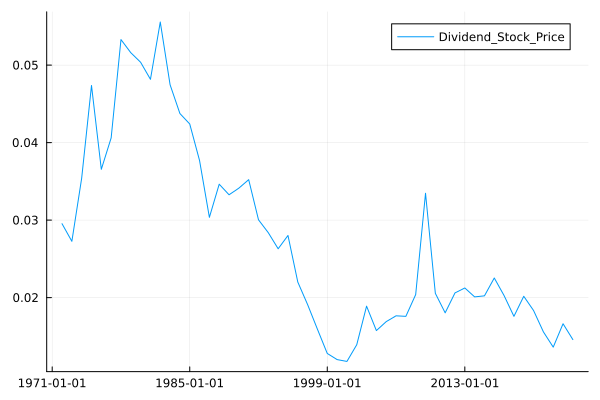

In [6]:
plot(dy)

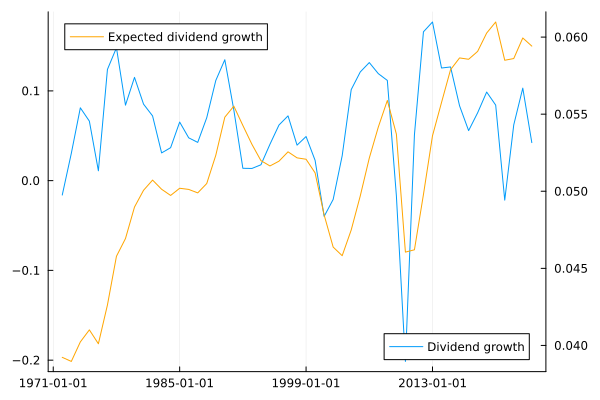

In [7]:
plot(div_growth; label="Dividend growth")
plot!(twinx(), exp_div_growth;label="Expected dividend growth", color= "orange")

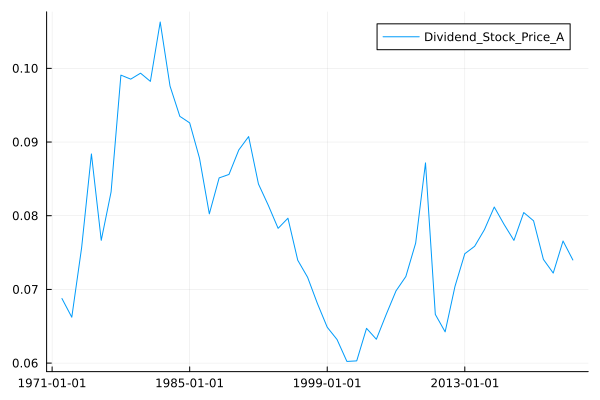

In [8]:
expected_equity_return = dy .+ exp_div_growth 
plot(expected_equity_return)

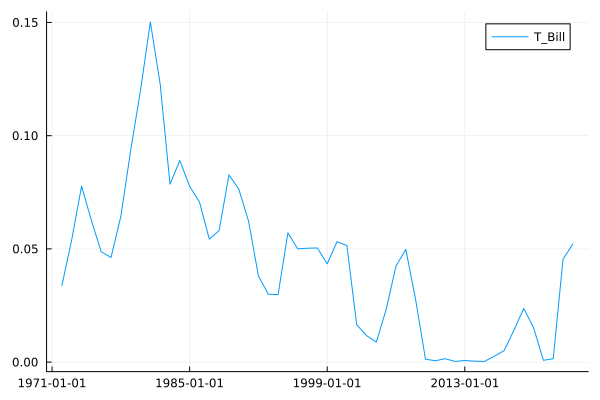

In [9]:
plot(sr)

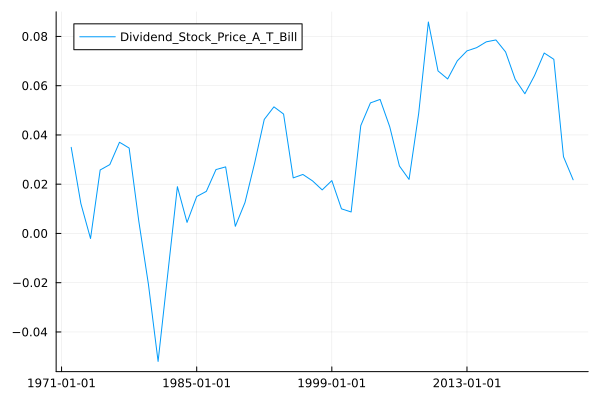

In [10]:
equity_premium = dy .+ exp_div_growth .- sr
plot(equity_premium)

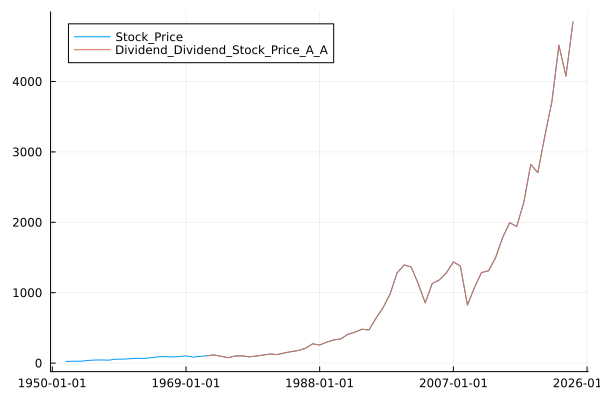

In [11]:
est_prices = data_source[:Dividend] ./ (expected_equity_return .- exp_div_growth)

plot(data_source[:Stock_Price])
plot!(est_prices)

In [12]:
β_hat, R2, log_likelihood, residuals, σ² = fit_ar1(values(expected_equity_return))

println(R2)
println(log_likelihood)
println(σ²)

UndefVarError: UndefVarError: `fit_ar1` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### inny model

In [13]:
data_source = collapse(TimeArray(df; timestamp = :Date), Dates.quarter, first)

data_source = data_source

div_growth = percentchange(data_source[:Dividend]) .* 400

dy = data_source[:Dividend] ./ data_source[:Stock_Price] .* 100

sr = data_source[:T_Bill] .* 100

data = merge(div_growth, dy, sr)



291×3 TimeArray{Float64, 2, Date, Matrix{Float64}} 1952-01-01 to 2024-07-01
┌────────────┬──────────┬──────────────────────┬────────┐
│            │ Dividend │ Dividend_Stock_Price │ T_Bill │
├────────────┼──────────┼──────────────────────┼────────┤
│ 1952-01-01 │ 0.945285 │              5.86856 │   1.57 │
│ 1952-04-01 │  6.58728 │              6.17496 │   1.57 │
│ 1952-07-01 │  2.77778 │              5.70866 │   1.81 │
│ 1952-10-01 │ -7.35724 │              5.80477 │   1.74 │
│ 1953-01-01 │ -3.74614 │              5.34496 │   1.96 │
│ 1953-04-01 │   1.8922 │              5.75414 │   2.19 │
│ 1953-07-01 │ 0.940233 │              5.73737 │   2.04 │
│ 1953-10-01 │   5.6338 │              5.86797 │   1.38 │
│     ⋮      │    ⋮     │          ⋮           │   ⋮    │
│ 2023-01-01 │  8.39874 │              1.66266 │   4.54 │
│ 2023-04-01 │  4.50477 │              1.64393 │   4.92 │
│ 2023-07-01 │  3.31911 │              1.50605 │   5.25 │
│ 2023-10-01 │  4.98562 │               1.6685 │   5.3

In [14]:
mean_Δd = values(mean(data[:Dividend]))[1]
Δd_demeaned = values(data[:Dividend]) .- mean_Δd

T = size(Δd_demeaned,1)

v = .036 #.009 #0.054 #.018


expected_Δd = zeros(T)

expected_Δd[1] = v * Δd_demeaned[1]

for t in 2:T
    expected_Δd[t] = expected_Δd[t-1] + v * (Δd_demeaned[t] - expected_Δd[t-1])
end


expected_Δd = (expected_Δd .+ mean_Δd) 

291-element Vector{Float64}:
 5.325206453417825
 5.370641051348828
 5.2772979735002705
 4.822454556799088
 4.513984986990373
 4.419600676394891
 4.2943434429896366
 4.3425639804504605
 4.419531677154244
 4.194890346484685
 ⋮
 6.6679704223456255
 6.760942760541189
 6.819903287121028
 6.736558500859022
 6.613530404408022
 6.554925500221492
 6.458394566032571
 6.417691053879282
 6.263822905071536

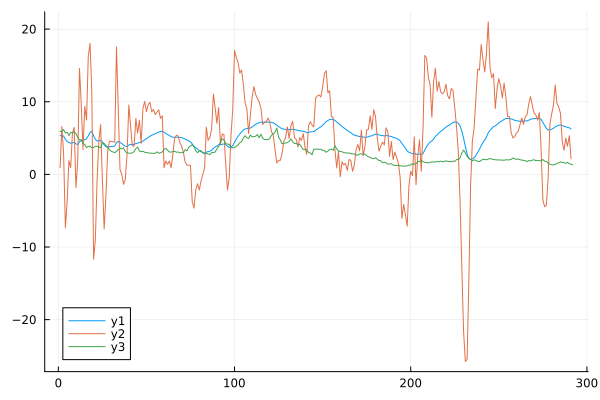

In [15]:
plot(expected_Δd)
plot!(values(data[:Dividend]))
plot!(values(dy))

In [16]:
erp = data[:Dividend_Stock_Price] .+ expected_Δd .- data[:T_Bill] 

mean(erp)

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-07-01 to 2024-07-01
┌────────────┬─────────────────────────────┐
│            │ Dividend_Stock_Price_T_Bill │
├────────────┼─────────────────────────────┤
│ 2024-07-01 │                     4.30204 │
└────────────┴─────────────────────────────┘

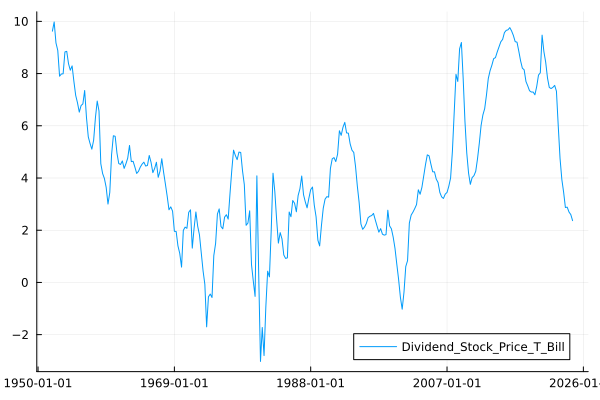

In [17]:
plot(erp)

In [18]:
function fit_ar1(y::Vector{Float64})
    """
    Fit AR(1) model: y_t = α + β*y_{t-1} + ε_t
    
    Returns:
    - coefficients: [α, β]
    - R²: coefficient of determination
    - log_likelihood: log-likelihood of the model
    """
    
    # Remove missing values and create lagged series
    T = length(y)
    y_t = y[2:end]
    y_lag = y[1:end-1]
    
    # OLS estimation
    X = hcat(ones(T-1), y_lag)
    β_hat = (X' * X) \ (X' * y_t)
    
    # Fitted values and residuals
    y_fitted = X * β_hat
    residuals = y_t .- y_fitted
    
    # R²
    SSR = sum(residuals.^2)
    SST = sum((y_t .- mean(y_t)).^2)
    R2 = 1 - SSR/SST
    
    # Log-likelihood (assuming normal errors)
    σ² = SSR / (T-1)
    log_likelihood = -0.5 * (T-1) * (log(2π) + log(σ²) + 1)
    
    return β_hat, R2, log_likelihood, residuals, σ²
end

fit_ar1 (generic function with 1 method)

In [19]:
β_hat, R2, log_likelihood, residuals, σ² = fit_ar1(values(erp))

([0.16444931015177303, 0.9560258832963264], 0.924926616704058, -320.34097893821314, [0.6105805560543214, -0.5254199709274054, -0.049677820047408616, -0.7619242723739061, 0.26770010471602124, 0.1946022956033504, 1.0257968540340672, 0.24379060135719044, -0.24629804184987947, -0.04691636325277493  …  -0.05542185060620408, -1.157962863312581, -1.1536813272577708, -0.7682371352492865, -0.4731533970845403, -0.6031842210506677, -0.02441927752855788, -0.22465136963738175, -0.14291681095424336, -0.2823401949530293], 0.5333225193743786)

In [20]:
println(R2)
println(log_likelihood)
println(σ²)

0.924926616704058
-320.34097893821314
0.5333225193743786


In [56]:
function ema(x, a, initial_value)
    T = length(x)
    result = zeros(length(x))
    result[1] = initial_value
    for t in 2:T
        result[t] = a .* x[t-1] .+ (1 - a) .* result[t-1]
    end
    return result
end

ema (generic function with 1 method)

In [160]:
mean(to(sample, Date(1982,12,31)))
presample_mean



3.9465908887188257

In [213]:
gains = [0.005, .01, .018, .02, .025, .03, .04, .05, .06, .07]
initial_values = collect(2:.5:9)
erp_var = zeros(length(initial_values), (length(gains)))
presample_mean = mean(presample)

for j in 1:length(initial_values)
    for i in 1:length(gains)
        excpected_div_growth = ema(values(sample[:Dividend]), gains[i], initial_values[j])
        excpected_div_growth = TimeArray(timestamp(sample), excpected_div_growth, [:Exp_Δdiv])

        erp = sample[:Dividend_Stock_Price] .+ excpected_div_growth .- sample[:T_Bill]
        erp_var[j, i] = var(values(erp))    

    end
end

min_index = argmin(erp_var)
println(erp_var[min_index])
println(min_index)
println(initial_values[min_index[1]])
println(gains[min_index[2]])

4.613338143110498
CartesianIndex(15, 2)
9.0
0.01


In [214]:
mean(presample)

3.9465908887188257

In [215]:
v = .01
#mean(presample)


excpected_div_growth = ema(values(sample[:Dividend]), v, 9)
excpected_div_growth = TimeArray(timestamp(sample), excpected_div_growth, [:Exp_Δdiv])

erp = sample[:Dividend_Stock_Price] .+ excpected_div_growth .- sample[:T_Bill]

display(mean(erp))
display(std(erp))

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-07-01 to 2024-07-01
┌────────────┬──────────────────────────────────────┐
│            │ Dividend_Stock_Price_Exp_Δdiv_T_Bill │
├────────────┼──────────────────────────────────────┤
│ 2024-07-01 │                              5.61472 │
└────────────┴──────────────────────────────────────┘

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-07-01 to 2024-07-01
┌────────────┬──────────────────────────────────────┐
│            │ Dividend_Stock_Price_Exp_Δdiv_T_Bill │
├────────────┼──────────────────────────────────────┤
│ 2024-07-01 │                              2.14787 │
└────────────┴──────────────────────────────────────┘

mean - 2.67951 
.03 - 3.34

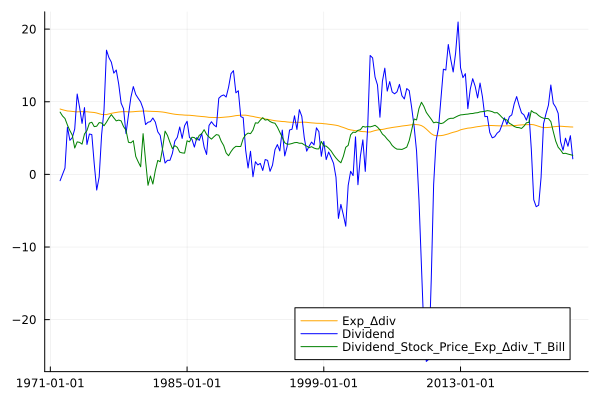

In [216]:
plot(excpected_div_growth; color=:orange)
plot!(sample[:Dividend]; color=:blue)
plot!(erp; color=:green)


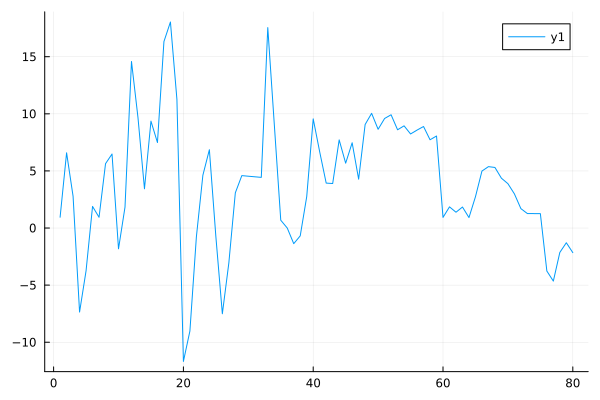

In [210]:
plot(presample)

In [211]:
β_hat, R2, log_likelihood, residuals, σ² = fit_ar1(values(erp))

([0.34646866527231207, 0.9334171345983366], 0.8711045375812091, -242.44012926255985, [-0.306605899206005, -0.1563351158945565, -0.7361676616983308, -0.6622318302740773, -0.5670863228983727, -1.761102075690359, 0.7425166103035332, -0.11969064602131319, -0.29577993548154424, 1.3298531803337532  …  -0.2426200588190115, -1.2362089978967594, -1.2680901065788195, -0.8866512393424753, -0.4785775879399048, -0.6122044320012225, -0.11609069715251374, -0.2593788325643587, -0.2432938345233704, -0.25601493072162773], 0.5892389709818798)

In [212]:
println(R2)
println(log_likelihood)
println(β_hat)
println(σ²)

0.8711045375812091
-242.44012926255985
[0.34646866527231207, 0.9334171345983366]
0.5892389709818798
